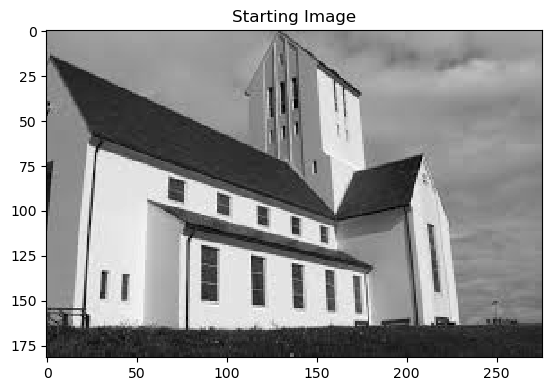

In [1]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('./house.png')
plt.imshow(img, interpolation='none', cmap='gray')
plt.title("Starting Image")
plt.show()

## Problem 1. Edge Detection (50%)

##### a) Implement convolution process of smoothing Image 1 with a 5 x 5 Gaussian Filter with 𝜎 = 1 𝑎𝑛𝑑 2 , plot the corresponding output images (10%).

In [2]:
def convolution(image, kernel, average=False):
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(image.shape)
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]
    return output


def gaussian(x, y, s):
    return 1 / (np.sqrt(2 * np.pi) * s) * np.e ** (-(x**2+y**2)/(2*s**2))
  
def gaussian_kernel(size, sigma):
    k = np.linspace(-(size // 2), size // 2, size)
    kT = k[::-1]
    kernel_2D = np.outer(kT, k)
    for i in range(size):
        for j in range(size):
            kernel_2D[i][j] = gaussian(k[j], kT[i], sigma)   
    return kernel_2D


def xDerive(x, y, s):
    return -(x / (s **2)) * np.e ** (-(x**2+y**2)/(2*s**2))
def yDerive(x, y, s):
    return -(y / (s **2)) * np.e ** (-(x**2+y**2)/(2*s**2))
    
def derive_kernel(size, sigma):
    k = np.linspace(-(size // 2), size // 2, size)
    kT = k[::-1]
    Hx = np.outer(kT, k)
    Hy = np.outer(kT, k)
    for i in range(size):
        for j in range(size):
            Hx[i][j] = xDerive(k[j], kT[i], sigma)
            Hy[i][j] = -yDerive(k[j], kT[i], sigma)
    return Hx, Hy

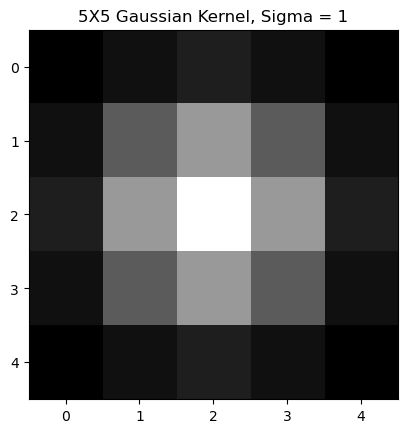

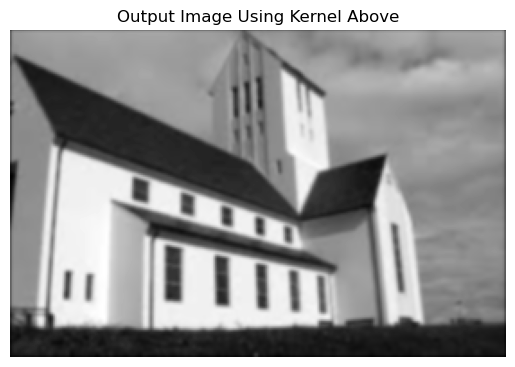

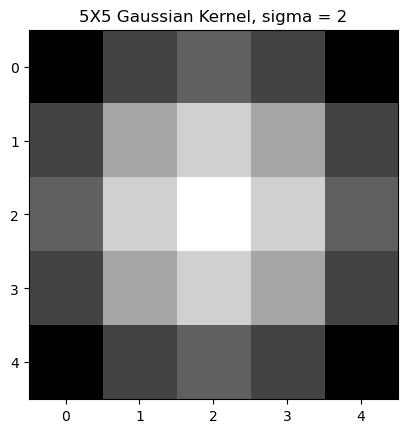

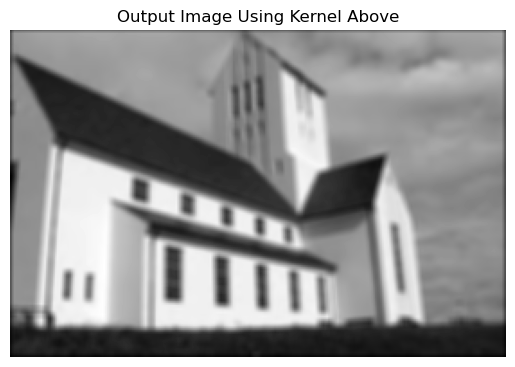

In [3]:
Guas1 = gaussian_kernel(5, 1)
plt.imshow(Guas1, interpolation='none', cmap='gray')
plt.title("{}X{} Gaussian Kernel, Sigma = {}".format(5, 5, 1))
plt.show()
Guas_img1 = convolution(img, Guas1, average=True)
plt.imshow(Guas_img1, cmap='gray')
plt.title("Output Image Using Kernel Above")
plt.axis('off')
plt.show()

Guas2 = gaussian_kernel(5, 2)
plt.imshow(Guas2, interpolation='none', cmap='gray')
plt.title("{}X{} Gaussian Kernel, sigma = {}".format(5, 5, 2))
plt.show()
Guas_img2 = convolution(img, Guas2, average=True)
plt.imshow(Guas_img2, cmap='gray')
plt.title("Output Image Using Kernel Above")
plt.axis('off')
plt.show()

##### b) Implement convolution process of convolving a 3 x 3 Sobel filters (𝑆𝑥 𝑎𝑛𝑑 𝑆𝑦) with the output images you obtained in step a. Plot the outputs of each step and the final edge map which, combines edges in x and y directions (10%).

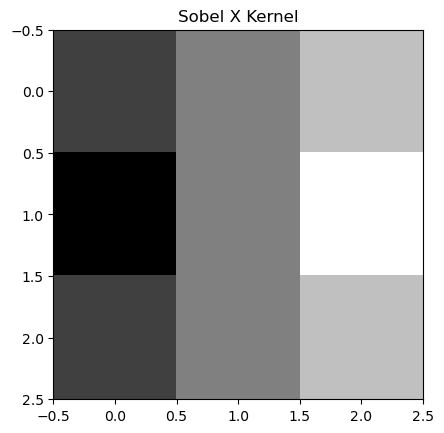

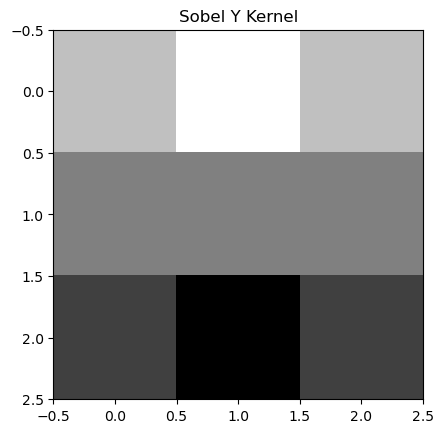

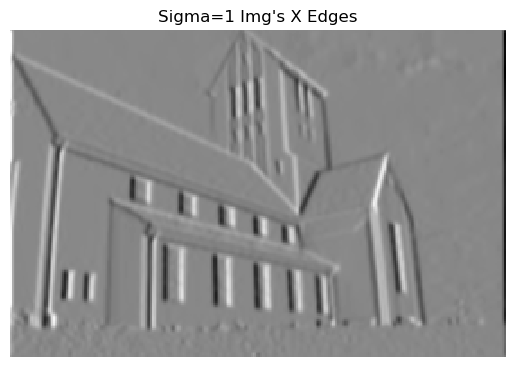

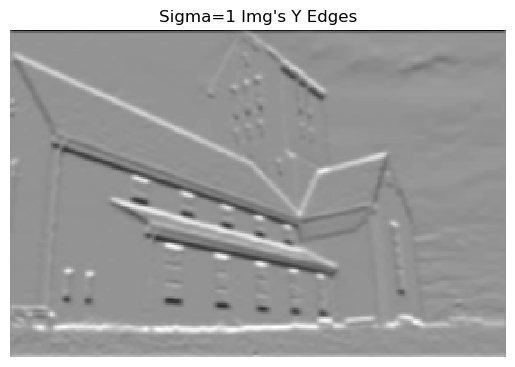

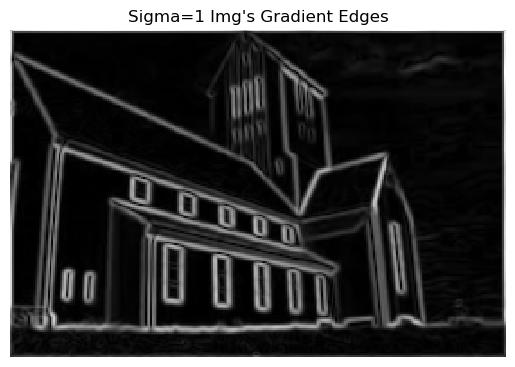

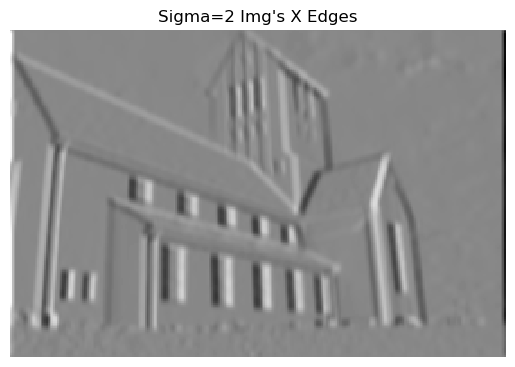

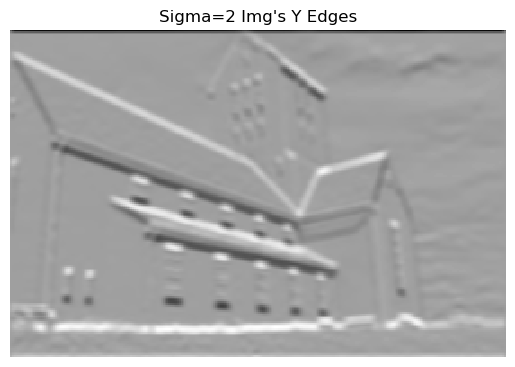

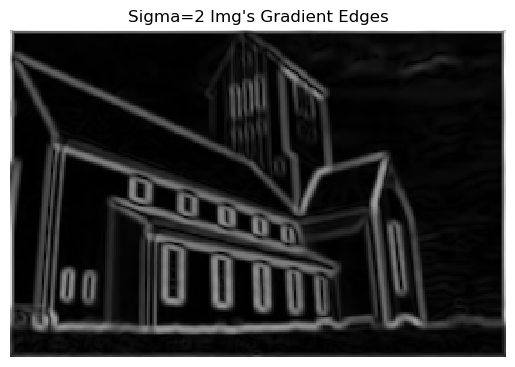

In [4]:
Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) /8.0
Sy=np.flip(Sx.T,axis=0)

plt.imshow(Sx, interpolation='none', cmap='gray')
plt.title("Sobel X Kernel")
plt.show()
plt.imshow(Sy, interpolation='none', cmap='gray')
plt.title("Sobel Y Kernel")
plt.show()


Sobelx_img1 = convolution(Guas_img1, Sx, average=False)
plt.imshow(Sobelx_img1, interpolation='none', cmap='gray')
plt.title("Sigma=1 Img's X Edges")
plt.axis('off')
plt.show()
Sobely_img1 = convolution(Guas_img1, Sy, average=False)
plt.imshow(Sobely_img1, interpolation='none', cmap='gray')
plt.title("Sigma=1 Img's Y Edges")
plt.axis('off')
plt.show()
sobel_grad1 = np.hypot(Sobelx_img1,Sobely_img1)
plt.imshow(sobel_grad1, interpolation='none', cmap='gray')
plt.title("Sigma=1 Img's Gradient Edges")
plt.axis('off')
plt.show()


Sobelx_img2 = convolution(Guas_img2, Sx, average=False)
plt.imshow(Sobelx_img2, interpolation='none', cmap='gray')
plt.title("Sigma=2 Img's X Edges")
plt.axis('off')
plt.show()
Sobely_img2 = convolution(Guas_img2, Sy, average=False)
plt.imshow(Sobely_img2, interpolation='none', cmap='gray')
plt.title("Sigma=2 Img's Y Edges")
plt.axis('off')
plt.show()
sobel_grad2 = np.hypot(Sobelx_img2,Sobely_img2)
plt.imshow(sobel_grad2, interpolation='none', cmap='gray')
plt.title("Sigma=2 Img's Gradient Edges")
plt.axis('off')
plt.show()

##### c) Implement convolution process of convolving Image 1 with $\frac{\partial G}{\partial x}$ 𝑎𝑛𝑑 $\frac{\partial G}{\partial y}$ filters (5 x 5 filters and for 𝜎 = 1 𝑎𝑛𝑑 2 , and plot the outputs of each step and the final edge map which combines edges in x and y directions (20%)

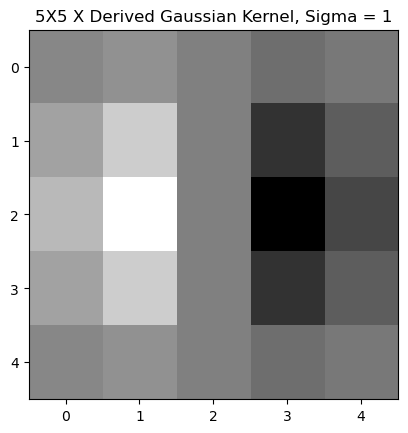

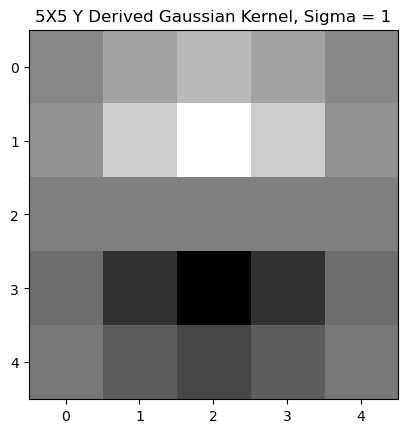

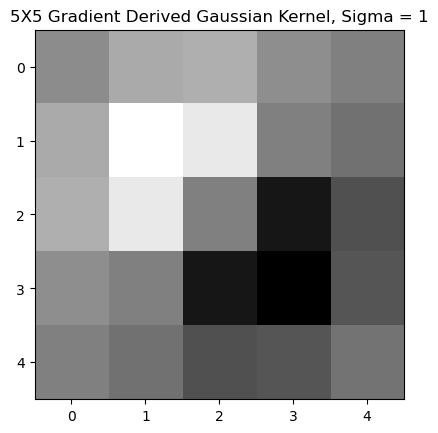

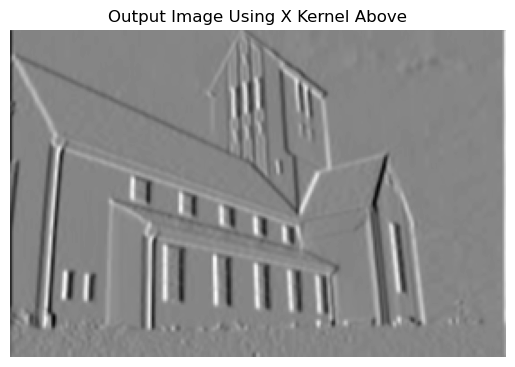

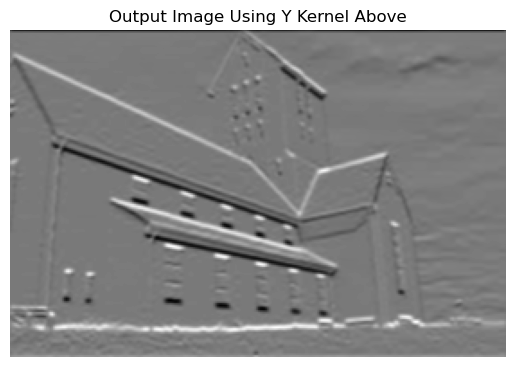

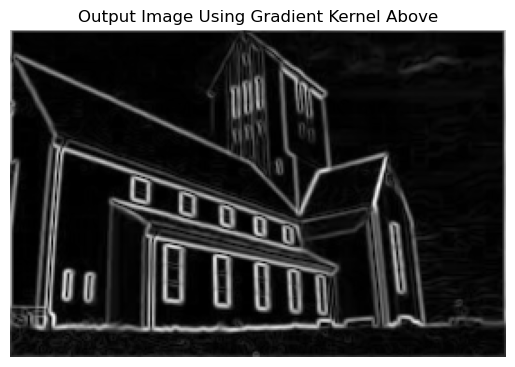

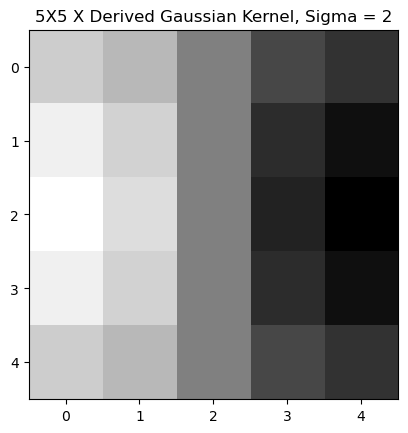

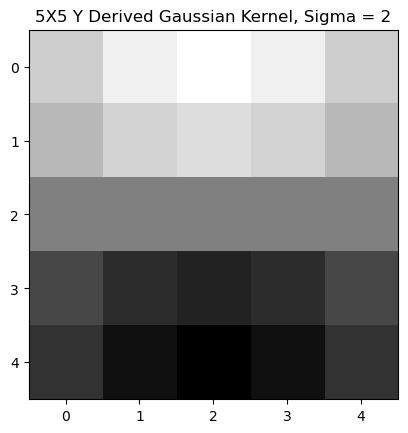

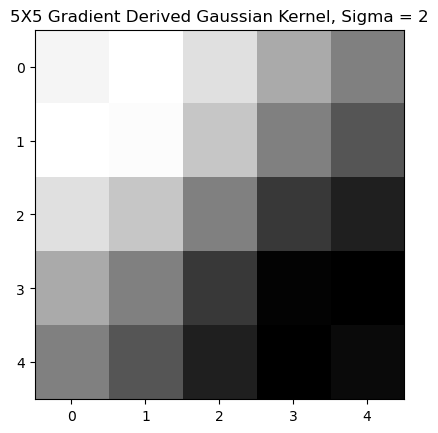

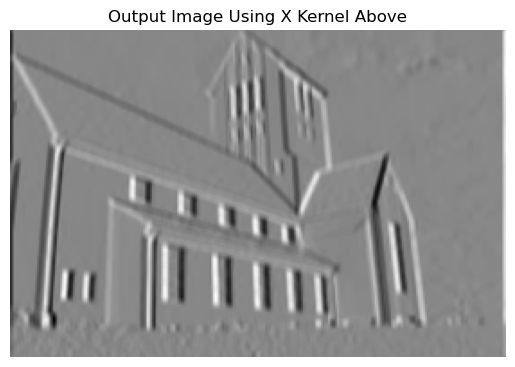

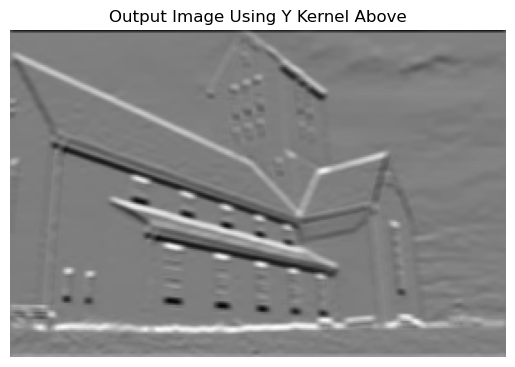

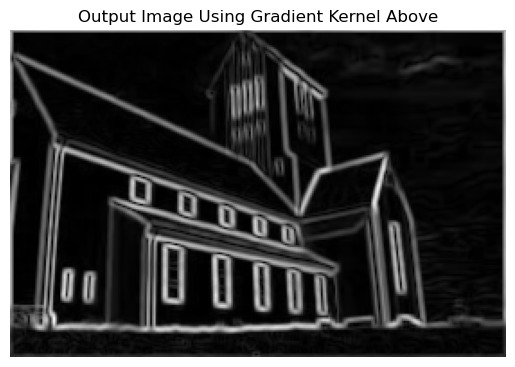

In [5]:
Deriv1x, Deriv1y = derive_kernel(5, 1)
plt.imshow(Deriv1x, interpolation='none', cmap='gray')
plt.title("{}X{} X Derived Gaussian Kernel, Sigma = {}".format(5, 5, 1))
plt.show()
plt.imshow(Deriv1y, interpolation='none', cmap='gray')
plt.title("{}X{} Y Derived Gaussian Kernel, Sigma = {}".format(5, 5, 1))
plt.show()
plt.imshow((Deriv1x+Deriv1y), interpolation='none', cmap='gray')
plt.title("{}X{} Gradient Derived Gaussian Kernel, Sigma = {}".format(5, 5, 1))
plt.show()
Derivx_img1 = convolution(img, Deriv1x, average=True)
plt.imshow(Derivx_img1, cmap='gray')
plt.title("Output Image Using X Kernel Above")
plt.axis('off')
plt.show()
Derivy_img1 = convolution(img, Deriv1y, average=True)
plt.imshow(Derivy_img1, cmap='gray')
plt.title("Output Image Using Y Kernel Above")
plt.axis('off')
plt.show()
Deriv_grad1 = np.hypot(Derivx_img1,Derivy_img1)
plt.imshow(Deriv_grad1, cmap='gray')
plt.title("Output Image Using Gradient Kernel Above")
plt.axis('off')
plt.show()

Deriv2x, Deriv2y = derive_kernel(5, 2)
plt.imshow(Deriv2x, interpolation='none', cmap='gray')
plt.title("{}X{} X Derived Gaussian Kernel, Sigma = {}".format(5, 5, 2))
plt.show()
plt.imshow(Deriv2y, interpolation='none', cmap='gray')
plt.title("{}X{} Y Derived Gaussian Kernel, Sigma = {}".format(5, 5, 2))
plt.show()
plt.imshow((Deriv2x+Deriv2y), interpolation='none', cmap='gray')
plt.title("{}X{} Gradient Derived Gaussian Kernel, Sigma = {}".format(5, 5, 2))
plt.show()
Derivx_img2 = convolution(img, Deriv2x, average=True)
plt.imshow(Derivx_img2, cmap='gray')
plt.title("Output Image Using X Kernel Above")
plt.axis('off')
plt.show()
Derivy_img2 = convolution(img, Deriv2y, average=True)
plt.imshow(Derivy_img2, cmap='gray')
plt.title("Output Image Using Y Kernel Above")
plt.axis('off')
plt.show()
Deriv_grad2 = np.hypot(Derivx_img2,Derivy_img2)
plt.imshow(Deriv_grad2, cmap='gray')
plt.title("Output Image Using Gradient Kernel Above")
plt.axis('off')
plt.show()

##### Please explain what do you observe comparing the final output of b and c (10%).

the edges in c are less blurry, more defined

## Problem 2. Corner Detection (50%)


##### Implement Harris Corner Detection algorithm step by step as explained in the class. Apply your script to detect corners in image 1. Plot the corner response map, and the non-maximum suppression output.

In [6]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError:
                pass
    
    return Z

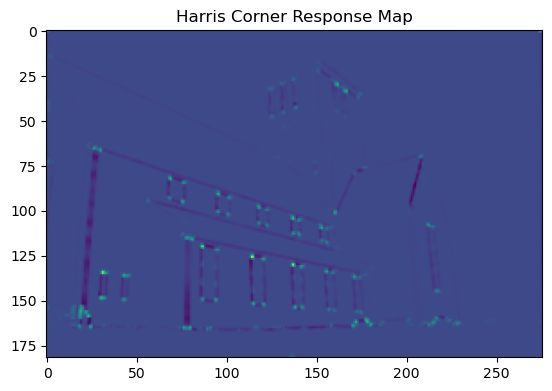

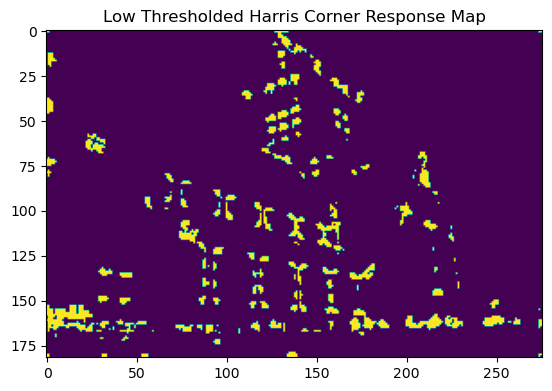

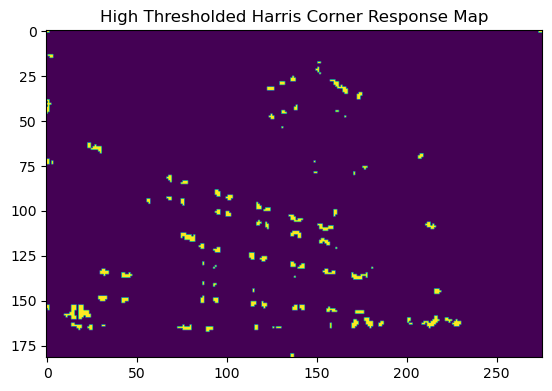

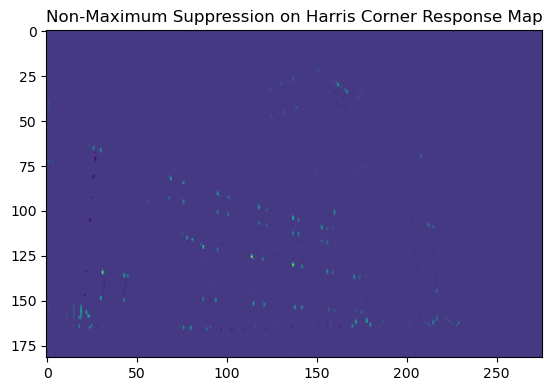

In [8]:
G = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) /16

# 1. Compute x and y derivatives of image
dx = convolution(img, Sx, average=False)
dy = convolution(img, Sy, average=False)

# 2. Compute products of derivatives at every pixel
# 3. Compute the sums of the products of derivatives at each pixel
# 4. Define the matrix at each pixel
A = convolution(dx*dx, G, average=False)
B = convolution(dy*dy, G, average=False)
C = convolution(dx*dy, G, average=False)

# 5. Compute the response of the detector at each pixel
corners = ((A*B - (C*C)) - 0.04*(A + B)*(A + B)) * 2e10
plt.imshow(corners)
plt.title("Harris Corner Response Map")
plt.show()

# 6. Threshold on value of R; compute non-max suppression.
tL = corners > 2e4
plt.imshow(tL)
plt.title("Low Thresholded Harris Corner Response Map")
plt.show()
tH = corners > 1e6
plt.imshow(tH)
plt.title("High Thresholded Harris Corner Response Map")
plt.show()
nms = non_max_suppression(corners, np.hypot(dx, dy))
plt.imshow(nms)
plt.title("Non-Maximum Suppression on Harris Corner Response Map")
plt.show()
